In [6]:
import json
import pickle as p
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.datasets import mnist
data = {}
(data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()

In [2]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(data['X_train'].shape))
print('Y_train: ' + str(data['Y_train'].shape))
print('X_test:  '  + str(data['X_test'].shape))
print('Y_test:  '  + str(data['Y_test'].shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


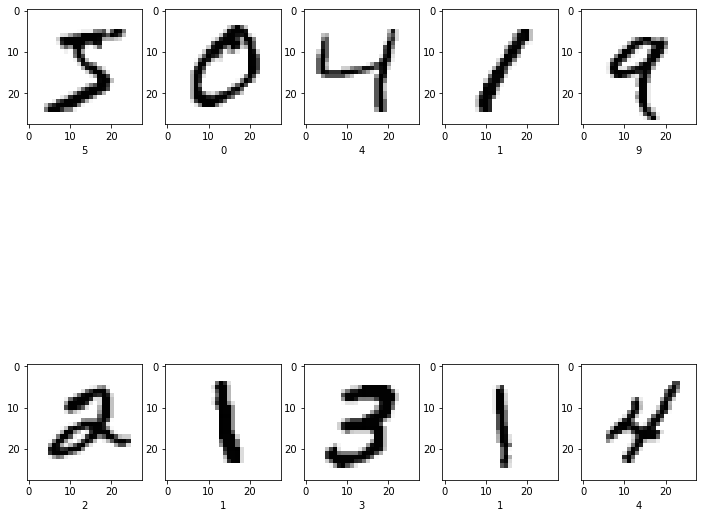

In [3]:
def plot_i(data=data, i=None, subplots=[]):
    
    if not i:
        fig = plt.figure(figsize=(12, 12))
        for i in range(10):
            plottable_image = np.reshape(data['X_train'][subplots[i]], (28, 28))
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(plottable_image, cmap='gray_r')
            ax.set_xlabel(data['Y_train'][i])
#             print(data['Y_train'][i])
    else:
        print('Y = {}'.format(Y_train[i]))
        plt.figure()
        plt.imshow(X_train[i])
        plt.grid(False)
        plt.show()

plot_i(subplots=np.arange(10))

In [18]:
# %%writefile mlfuncs.py
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from tensorflow import keras
# import json
# import pickle

# from tensorflow.keras.datasets import mnist
# data = {}
# (data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()

def make_model(data=data):
    model=None
    data['X_train'] = data['X_train']/255.
    data['X_test'] = data['X_test']/255.
    
    data['X_train'] = data['X_train'].reshape((60000, 784, ))
    data['X_test'] = data['X_test'].reshape((10000, 784, ))
    
    model = keras.Sequential([
#         keras.layers.Flatten(input_shape=(28, 28)),
        
        keras.layers.Dense(16, activation='relu', input_shape=(784,)),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy']
                 )
    return model

def fit_data(data, model):
    print(data['X_train'].shape)
    model.fit(data['X_train'], data['Y_train'], epochs=3,
              validation_data=(data['X_test'], data['Y_test']))
    return model

def train_model():
    data = {}
    (data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()
    model = make_model(data=data)
    model = fit_data(data, model)
    
    _, test_acc = model.evaluate(data['X_test'],  data['Y_test'], verbose=2)
    print('\nTest accuracy:', test_acc)
    
    return model

def get_params(model):
    weights=[]
    for i in range(len(model.layers)):
#         weights.append(layer.get_weights()[0].tolist())
#         weights.append(layer.get_weights()[1].tolist())
        weights.append([model.layers[i].get_weights()[0].tolist(),
                        model.layers[i].get_weights()[1].tolist()])
    return weights

def get_params_json(weights, ret_dict = False):
    dat = {}
    for i in range(len(weights)):
        sdat = {}
        sdat['weights'] = weights[i][0]
        sdat['biases'] = weights[i][1]
#         print(len(weights[i][0]), len(weights[i][0][0]))
        dat['layer'+str(i)] = sdat
#         print(len(dat['layer'+str(i)]['weights']), len(dat['layer'+str(i)]['weights'][0]))

    with open('dat.dict', 'wb') as f:
        p.dump(dat, f)
        f.close()
        print()
        
    if ret_dict: return dat
    

    
    dat = json.dumps(dat)
    
    return dat

In [22]:
# Call this function to reset weights
def reset_weights():
    params_json = get_params_json(get_params(train_model()))
    return params_json

# Call this function to get dat from the pickle of {dat}
def get_weights():
    try:
        with open('dat.dict', 'rb') as f:
            dat = p.load(f)
            f.close()
            print('get data from pickle')
            
    except:
        dat = reset_weights()
        print('restting data')
        
    return dat

In [23]:
dat = get_weights()

get data from pickle
